# Homework 7


You are waiting on some datasets from different teams but the approval process may take some time. 

You have no intention to wait! You will generate some fake data to get started. 

Here are some info you expect from the management:
* Employees dataset contains employee id, name, lastname, phone, state (~ 10K records) (Use states of US east coast only) 
* Salary dataset contains employee id, department id, yearly salary
* Department dataset contains department id, department name (5-10 departments) 

Here are the questions expected to be answered:

1. Visualize the average salary of each department
1. Visualize the total number of employees living in each state for each department
1. Visualize salary distribution of different states
1. Visualize salary distribution of different departments

You can use faker library (but you don't have to): https://faker.readthedocs.io/en/master/

`Optional:` 

Try to make dataframes realistic. 
* Salary distribution as normal distribution
* Salary of different states can be higher for 5-10K compared to other states


In [1]:
pip install Faker

Note: you may need to restart the kernel to use updated packages.


In [2]:
from faker import Faker
fake = Faker()

In [3]:
import pandas as pd
def Employees_dataset(i):
        Employees = [{'employee id': fake.random_int(1, 11111),
                     'name' : fake.name(),
                     'lastname': fake.name(),
                     'phone' : fake.phone_number(),
                     'state' : fake.state()} for x in range(i)]
        
        return Employees
Employees_df = pd.DataFrame(Employees_dataset(i=10000))
Employees_df.head()


,employee id,name,lastname,phone,state
0,3370,Stephen Dodson,Erica Tucker,939-538-9763x6658,Nevada
1,9348,Elizabeth Fitzgerald,Peter Flores,+1-951-144-2533x673,Ohio
2,5718,Catherine Terrell,David Moran,522-405-1432,Arkansas
3,7566,John Lang,Cory Mueller,+1-420-823-5038x81786,Rhode Island
4,10541,Melinda Burgess,Amanda James,+1-127-421-2371,South Dakota


In [4]:
def Salary_dataset(i):
        Salary = [{'employee id': fake.random_int(),
                     'department id' : fake.random_int(),
                     'yearly salary': fake.random_int()} for x in range(i)]
        
        return Salary
Salary_df = pd.DataFrame(Salary_dataset(i=10000))
Salary_df.head()

,employee id,department id,yearly salary
0,9707,2417,4209
1,3874,167,1054
2,3344,5850,6508
3,7613,8524,5851
4,3085,6069,2712


In [5]:
def Department_dataset(i):
        Department = [{'department id' : fake.random_int(),
                     'department name': fake.random_element(elements=('HR', 'Financial', 'Commercial', 'Production', 'Administrative', 'Executive'))} for x in range(i)]
        
        return Department
Department_df = pd.DataFrame(Department_dataset(i=10000))
Department_df.head()

,department id,department name
0,1818,HR
1,3436,Executive
2,9065,Administrative
3,2674,Financial
4,5566,HR


In [6]:
Employees_df.to_csv('Employees.csv', index=False)
Salary_df.to_csv('Salary.csv', index=False)
Department_df.to_csv('Department.csv', index=False)


1. Visualize the average salary of each department

In [7]:
Dept_Sal = Salary_df.merge(Department_df, on = 'department id')
Dept_Sal

,employee id,department id,yearly salary,department name
0,9707,2417,4209,HR
1,812,2417,3912,HR
2,7613,8524,5851,Production
3,7061,8524,3734,Production
4,3085,6069,2712,Commercial
...,...,...,...,...
10022,9075,4443,2399,Financial
10023,2712,6689,9513,Executive
10024,2712,6689,9513,HR
10025,1998,8937,7048,Executive


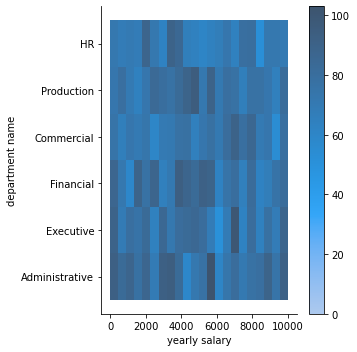

In [8]:
import seaborn as sns
from matplotlib import pyplot as plt
plot = sns.displot(Dept_Sal, x="yearly salary", y="department name", cbar = True)


 Visualize the total number of employees living in each state for each department

In [9]:
Empstate_Dept = Employees_df.merge(Dept_Sal, on = 'employee id')
Empstate_Dept

,employee id,name,lastname,phone,state,department id,yearly salary,department name
0,9348,Elizabeth Fitzgerald,Peter Flores,+1-951-144-2533x673,Ohio,6047,1873,Administrative
1,9348,Elizabeth Fitzgerald,Peter Flores,+1-951-144-2533x673,Ohio,6047,1873,Executive
2,9348,Elizabeth Fitzgerald,Peter Flores,+1-951-144-2533x673,Ohio,3262,4932,HR
3,9348,Jonathan Hurst,Kristina Leonard,(281)058-9854,New Mexico,6047,1873,Administrative
4,9348,Jonathan Hurst,Kristina Leonard,(281)058-9854,New Mexico,6047,1873,Executive
...,...,...,...,...,...,...,...,...
8641,8680,Angela Cannon MD,Hannah Dixon,(264)677-4616x02797,Hawaii,4358,9309,Production
8642,6919,Susan Nunez,Adam Patterson,001-608-083-9351,Mississippi,3853,156,Executive
8643,6919,Susan Nunez,Adam Patterson,001-608-083-9351,Mississippi,9386,6838,Commercial
8644,2144,Harold Miles,Kelsey Cox,2153381680,West Virginia,795,1495,Commercial


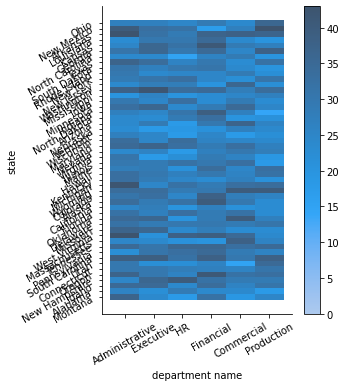

In [10]:
plot = sns.displot(Empstate_Dept, x="department name", y="state", cbar = True)
plot.ax.tick_params(labelrotation = 30)

Visualize salary distribution of different states

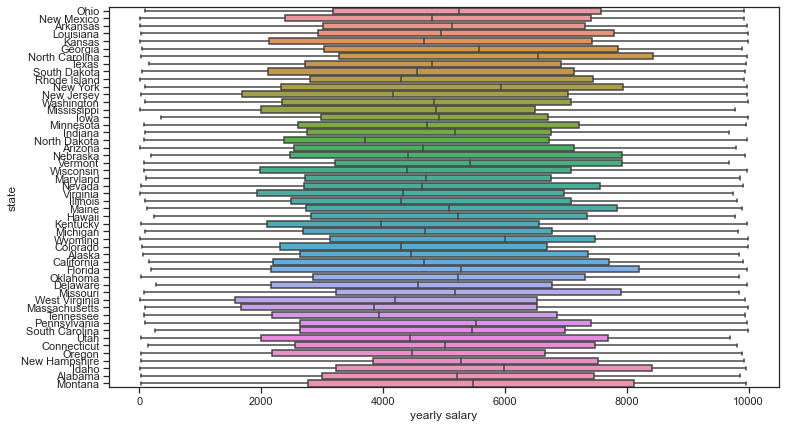

In [11]:
sns.set(rc={"figure.figsize":(12, 7)}) 
sns.set_style('ticks')

plot = sns.boxplot(y = 'state', x = 'yearly salary', data = Empstate_Dept )

Visualize salary distribution of different departments

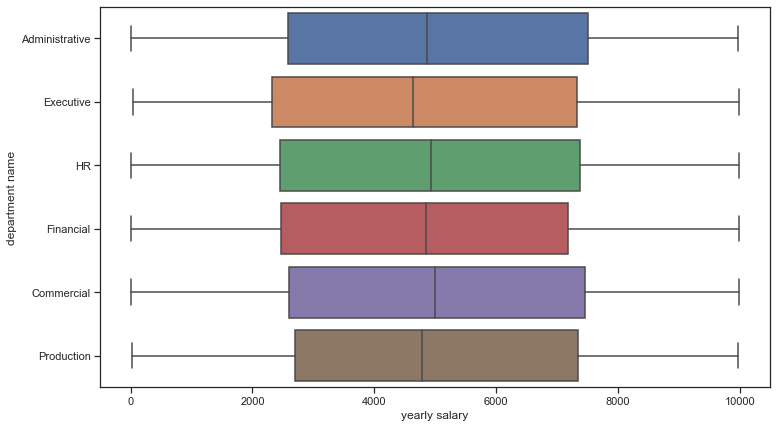

In [12]:
sns.set(rc={"figure.figsize":(12, 7)}) 
sns.set_style('ticks')

plot = sns.boxplot(y = 'department name', x = 'yearly salary', data = Empstate_Dept )

1. Salary distribution as normal distribution
2. Salary of different states can be higher for 5-10K compared to other states

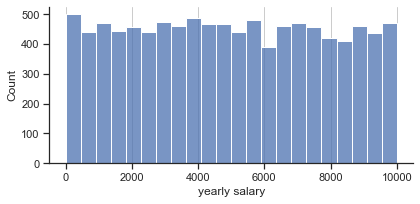

In [13]:
plot = sns.displot(data = Salary_df, x= 'yearly salary', kind = 'hist', height=3 ,aspect=2)
plot.ax.grid(axis = 'x')

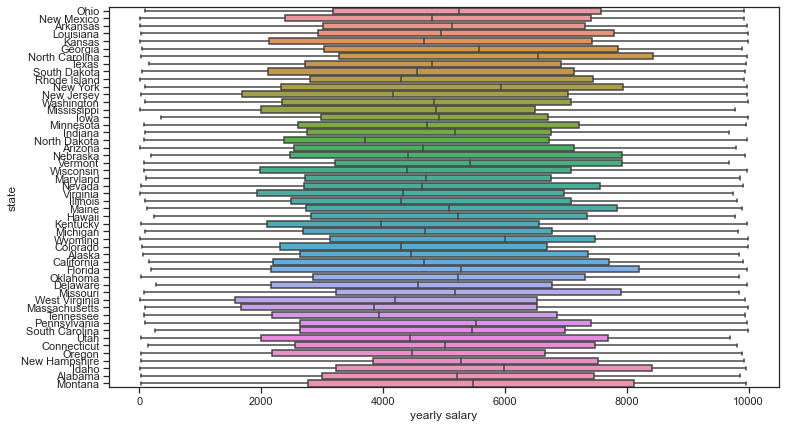

In [14]:
plot = sns.boxplot(y = 'state', x = 'yearly salary', data = Empstate_Dept )